In [1]:
!pip install stats
!pip install preprocessing

     |████████████████████████████████| 127 kB 6.4 MB/s 
  Created wheel for stats: filename=stats-0.1.2a0-py3-none-any.whl size=24297 sha256=73026ad704ec672a43703541d277d5852434a7b85ec3b39da4add044f5f2d0aa
  Stored in directory: /root/.cache/pip/wheels/e3/1c/58/620049eecc13fb5b4920470895e07a39f86e889a0a58b11976
Successfully built stats
     |████████████████████████████████| 349 kB 8.2 MB/s 
     |████████████████████████████████| 1.4 MB 57.8 MB/s 
     |████████████████████████████████| 1.2 MB 50.3 MB/s 
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367722 sha256=c25c0d926c1b4b6051f46190493597f5707498d770ee35433bd091ef14b93c05
  Stored in directory: /root/.cache/pip/wheels/90/5e/9e/4cb46185f2a16c60e6fc524372ba7fef89ce3347734c8798b6
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


# Intro
* Bajamos dataset
* Analizamos de manera basica el dataset (Cantidad de filas, columnas, tipo del label (regresion, clasificacion binaria, clasificacion multiclase), etc)
* Limpiamos el dataset (remover o hacer algunos operaciones sobre lso nans)
* Ingenieria de features (correr tests de correlacion, encontrar buenas features para predecir salidas, etc.)
* Normalizar los datos
* Crear un modelo base-line que me permita obtener metricas iniciales de un modelo basico (en general un modelo lineal)
* Crear modelos mas complejos como no lineales con deep-learning

## Load dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import torch
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Clase_5/class_7_wine_dataset_v2.csv')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
dtypes: float64(11), int64

In [6]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375


Objetivo: crear un modelo para predecir la calidad del vino basandonos en los parámetros medidos


## Data analysis of the output

Min value: 3
Max value: 9


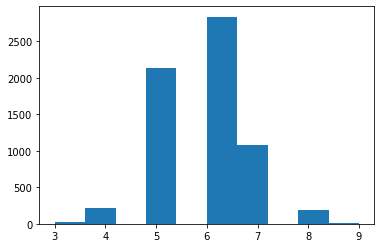

In [7]:
quality = dataset.quality.to_numpy()
fig, ax1 = plt.subplots(1,1)
ax1.hist(quality)
print(f"Min value: {quality.min()}")
print(f"Max value: {quality.max()}")

* Regresión lineal: no se pone nada al final
* Clasificación binaria: se pone una sigmoid al final
* Clasificación multiclase: se pone un softmax al final

In [8]:
# Empezamos con un caso de clasificación binaria
# Agregamos una feature (output) binarizando el quality segun si es menor/igual a 6 o mayor
dataset['quality_label'] = dataset.quality.apply(lambda label: 0 if label <=6 else 1)
print(len(dataset[dataset['quality_label'] == 0]))
print(len(dataset[dataset['quality_label'] == 1]))

5220
1277


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
 15  quality_label        

## Clean dataset

In [10]:
nans = dataset[dataset.isna().sum(axis=1)==1]
print(nans.shape)

(30, 16)


In [11]:
ds = nans = dataset[dataset.isna().sum(axis=1)==0]
print(ds.shape)

(6463, 16)


## Feature engineering

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

In [13]:
# Tengo que trasnformar todas las varaiabeles / columanas categoricas en algo que mi modelo peuda usar apra entrenar

#Tratamiento para la variales type
ds.type.unique() #Mapear type a 2 variabels one hor encoding

y = pd.get_dummies(ds.type, prefix="type")
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   type_red    6463 non-null   uint8
 1   type_white  6463 non-null   uint8
dtypes: uint8(2)
memory usage: 63.1 KB


In [14]:
#Concatenar las dumies al dataset principal
ds = pd.concat([ds, y], axis=1)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

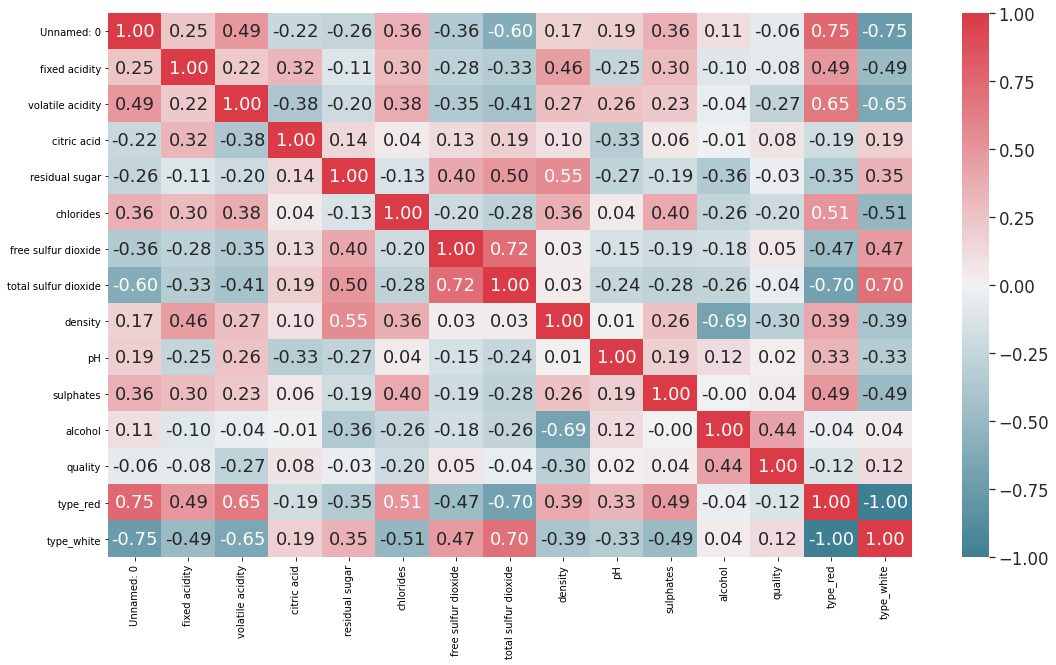

In [15]:
corr = ds.loc[:, (ds.columns != 'vendor_id') & (ds.columns != 'type') & (ds.columns != 'quality_label')].corr()
fig, ax1 = plt.subplots(1, figsize=(18,10))
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt = ".2f")
sns.set(font_scale=1.5)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


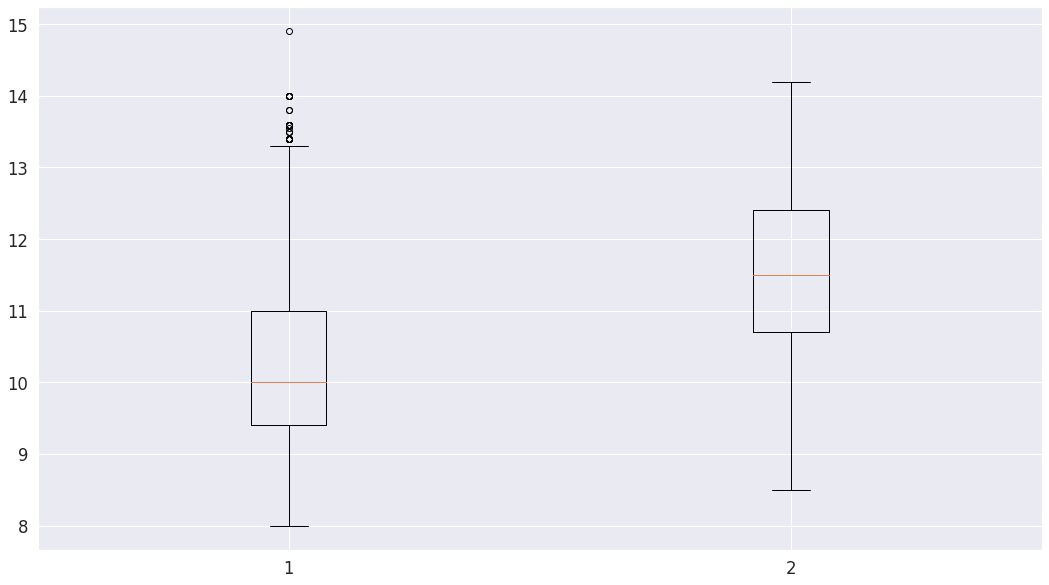

In [16]:
fig, ax1 = plt.subplots(1, figsize=(18,10))
_ = ax1.boxplot([dataset.loc[dataset['quality_label'] == 0, 'alcohol'], 
                 dataset.loc[dataset['quality_label'] == 1, 'alcohol']])

In [17]:
#Nos vamos a quedar con las variables que vamos a usar para hacer el fit del modelo
final_data = ds.drop(['Unnamed: 0', 'quality_label', 'quality', 'vendor_id', 'type'], axis=1, inplace=False)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  type_red              6463 non-null   uint8  
 12  type_white            6463 non-null   uint8  
dtypes: float64(11), uint8(2)
memory usage: 618.5 KB


In [18]:
final_data = final_data.to_numpy()
label = ds.quality_label.to_numpy()

## Normalizacion de datos


In [19]:
normalized_data = (final_data - np.min(final_data, axis=0)) / (np.max(final_data, axis=0)-np.min(final_data, axis=0))
print(np.max(normalized_data, axis=0))
print(np.min(normalized_data, axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Dataset split

In [20]:
n = final_data.shape[0]
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[:int(0.8 * n)]
test_idx = idx[int(0.8 * n):]
assert len(train_idx) + len(test_idx) == len(idx)

In [21]:
X_train = normalized_data[train_idx,:]
y_train = label[train_idx]

X_test = normalized_data[test_idx,:]
y_test = label[test_idx]

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5170, 13)
(5170,)
(1293, 13)
(1293,)


## Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

lr_model = LogisticRegression(C=1, solver='sag', max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr_test_scores = lr_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_test_scores[:,1])
print(metrics.auc(fpr, tpr))

0.8001692511778967


## Random Forest

In [25]:
rf_model = RandomForestClassifier(n_estimators=1000, max_depth=None, random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [26]:
rf_test_score = rf_model.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_test_score[:,1])
print(metrics.auc(fpr, tpr))

0.9372798591098304


## Deep learning

In [41]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [42]:
class CustomDataset(Dataset):
  def __init__(self, X, Y):
    super().__init__()
    self.X = X
    self.Y = Y
  
  def __len__(self):
    return self.X.shape[0]
  
  def __getitem__(self, idx):
    return self.X[idx,:], self.Y[idx]

In [29]:
training = CustomDataset(X_train, y_train)
testing = CustomDataset(X_test, y_test)

In [30]:
print(len(training))
print(len(testing))

5170
1293


In [43]:
training_dataloader = DataLoader(training, batch_size=128, shuffle=True)
test_dataloader = DataLoader(testing, batch_size=128, shuffle=True)

In [44]:
class NNet(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=13, out_features=20, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=20, out_features=5, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features=5, out_features=1, bias=True)
  
  def forward(self, x):
    z1 = self.linear_1(x)
    a1 = self.relu_1(z1)
    z2 = self.linear_2(a1)
    a2 = self.relu_2(z2)
    y = self.linear_3(a2)
    return y

In [45]:
nnet = NNet()

In [46]:
print(nnet)

NNet(
  (linear_1): Linear(in_features=13, out_features=20, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=20, out_features=5, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=5, out_features=1, bias=True)
)


In [47]:
criterion = torch.nn.BCEWithLogitsLoss(reduction='sum')
optimizer = torch.optim.SGD(nnet.parameters(), lr=0.001)
torch.cuda.is_available()

True

In [50]:
device = ""
if torch.cuda.is_available():
  device = "cuda:0"
else:
  device = "cpu"

nnet.to(device)

for epoch in range(100):

  running_loss = 0
  nnet.train()
  for i, data in enumerate(training_dataloader):

    # batch
    x, y = data
    x = x.to(device).float()
    y = y.to(device).float().reshape(-1,1)

    # set gradient to zero
    optimizer.zero_grad()

    # forward
    y_hat = nnet(x)

    # loss
    loss = criterion(y_hat, y)

    # backward
    loss.backward()

    # update of parameters
    optimizer.step()

    # compute metrics and statistics
    running_loss += loss.item()
  
  nnet.eval()
  nnet_test_score = []
  truth = []
  for i, data in enumerate(test_dataloader):
    # batch
    x, y = data
    x = x.to(device).float()
    y = y.to(device).float().reshape(-1,1)

    # forward
    y_hat = nnet(x)

    # accumulate data
    truth += list(y)
    nnet_test_score += list(y_hat)

  fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_test_score[:,1])
  auc = metrics.auc(fpr, tpr)
  print(f"Epoch = {epoch} | loss = {running_loss / len(training)} | auc = {auc}")

Epoch = 0 | loss = 0.4910866123103542 | auc = 0.9372798591098304
Epoch = 1 | loss = 0.4883149764985134 | auc = 0.9372798591098304
Epoch = 2 | loss = 0.4852680143581368 | auc = 0.9372798591098304
Epoch = 3 | loss = 0.4816418870966485 | auc = 0.9372798591098304
Epoch = 4 | loss = 0.47717839135883855 | auc = 0.9372798591098304
Epoch = 5 | loss = 0.4718167188780912 | auc = 0.9372798591098304
Epoch = 6 | loss = 0.464876768160143 | auc = 0.9372798591098304
Epoch = 7 | loss = 0.4564509825272994 | auc = 0.9372798591098304
Epoch = 8 | loss = 0.44677195336878645 | auc = 0.9372798591098304
Epoch = 9 | loss = 0.43682791748637156 | auc = 0.9372798591098304
Epoch = 10 | loss = 0.42897771580768046 | auc = 0.9372798591098304
Epoch = 11 | loss = 0.42264949459171847 | auc = 0.9372798591098304
Epoch = 12 | loss = 0.41861821622866957 | auc = 0.9372798591098304
Epoch = 13 | loss = 0.41627781570995337 | auc = 0.9372798591098304
Epoch = 14 | loss = 0.41344229331099547 | auc = 0.9372798591098304
Epoch = 15 | 